
Q: How much would I need to sell the condo in order to break even?


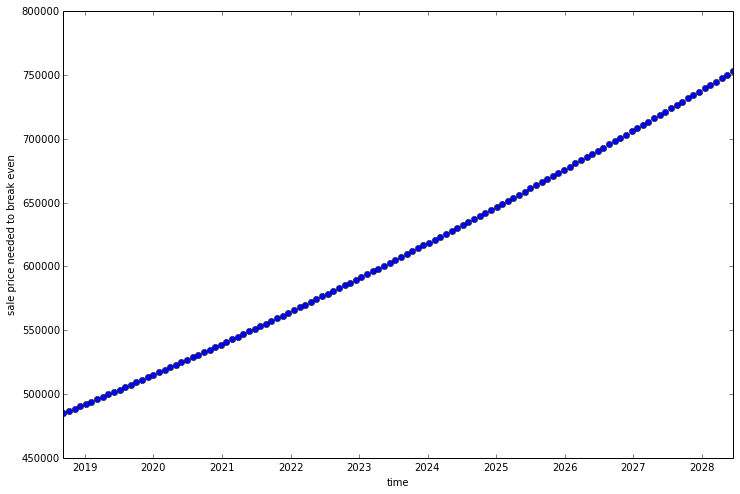

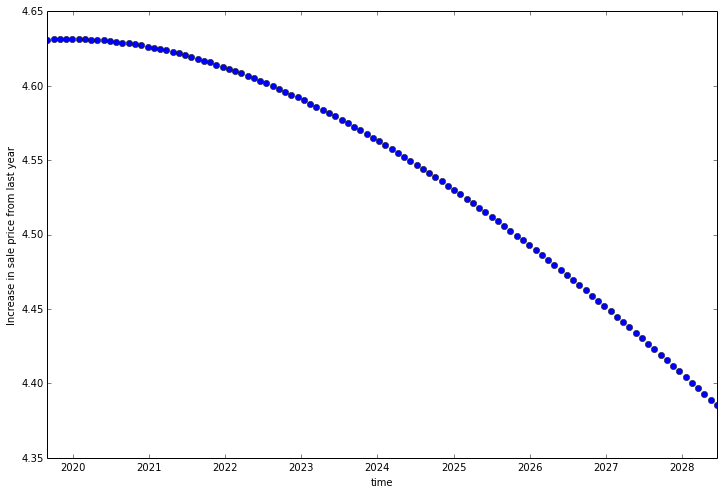

In [256]:
%matplotlib inline 

from datetime import timedelta
import matplotlib.pyplot as plt

YEARS_OWNED = 10
MONTHS_OWNED = YEARS_OWNED*12
COMMISSION_RATE = 0.05
OTHER_INVESTMENT_RETURN_RATE = 0.066
HOME_PRICE = 460000
SELLING_COST = (COMMISSION_RATE * HOME_PRICE)
CLOSING_COST = 122000
CURRENT_RENT = 1450
NEW_MONTHLY_PAYMENT = 2100
MONEY_TOWARD_LOAN = 1800


class MonthRecord:
    def __init__(self, month):
        self.months_owned = month
        self.money_saved_on_living = self._money_saved_on_living()
        self.money_lost_from_other_investments = self._money_lost_from_other_investments()
        self.money_needed_to_break_even = self._money_needed_to_break_even()
        self.delta_loss = 0
        self.sale_price_needed_to_break_even = self._sale_price_needed_to_break_even()
        
    def _money_needed_to_break_even(self):
        self.money_saved_on_living = self._money_saved_on_living()
        self.money_lost_from_other_investments = self._money_lost_from_other_investments()
        self.delta_loss = self.money_lost_from_other_investments - self.money_saved_on_living
                
        return SELLING_COST + self.money_saved_on_living + self.money_lost_from_other_investments

    def _money_lost_from_other_investments(self):
        return (OTHER_INVESTMENT_RETURN_RATE * \
                (CLOSING_COST + (self.months_owned * (NEW_MONTHLY_PAYMENT-CURRENT_RENT))) / 12) * self.months_owned

    def _money_saved_on_living(self):
        new_money_spent_on_living = (NEW_MONTHLY_PAYMENT - MONEY_TOWARD_LOAN) - CURRENT_RENT
        return 0 - (self.months_owned * new_money_spent_on_living)
    
    def _sale_price_needed_to_break_even(self):
        return self._money_needed_to_break_even() + HOME_PRICE
        

class CostSimulator:
    def __init__(self):
        self.purchase_date = date.today()
        self.current_date = date.today()
        self.months_owned = 0
        self.history = dict()
        self.history[self.current_date] = MonthRecord(self.months_owned)
        self.last_date = self.current_date - timedelta(hours=24*30*12)
        
    def _increment_month(self):
        # Save the last month
        self.current_date += timedelta(hours=24*30)
        self.last_date = self.current_date - timedelta(hours=24*30*12)
        self.months_owned += 1
        self.history[self.current_date] = MonthRecord(self.months_owned)
    
    def _money_needed_to_break_even(self):
        return self.history[self.current_date]._money_needed_to_break_even()

    def _money_lost_from_other_investments(self):
        return self.history[self.current_date]._money_lost_from_other_investments()

    def _money_saved_on_living(self):
        return self.history[self.current_date]._money_saved_on_living()
    
    def _sale_price_needed_to_break_even(self):
        return self.history[self.current_date]._sale_price_needed_to_break_even()
    
    
results = []
sale_prices = []
dates_arr = []
cost_simulator = CostSimulator()
for month_offset in range(1, MONTHS_OWNED+1):
    '''
    print "----------------------"
    print "\nMonth: " , cost_simulator.current_date
    print "----------------------"
    '''
    
    cost_simulator._increment_month()

    sale_price = cost_simulator._sale_price_needed_to_break_even()    
    last_sale_price = 1000000000000000000000000000
    if cost_simulator.last_date in cost_simulator.history:
        last_sale_price = cost_simulator.history[cost_simulator.last_date]._sale_price_needed_to_break_even()
        
    sale_prices.append(sale_price)
    dates_arr.append(cost_simulator.current_date)
    results.append((sale_price-last_sale_price)/last_sale_price * 100)

    
print "\nQ: How much would I need to sell the condo in order to break even?"
    

dates = matplotlib.dates.date2num(dates_arr)

plt.figure(figsize=(12,8))
plt.plot_date(dates, sale_prices)
#plt.plot(sale_prices)
plt.xlabel("time")
plt.ylabel("sale price needed to break even")
plt.show()

plt.figure(figsize=(12,8))
plt.plot_date(dates[12:], results[12:])
#plt.plot(results[12:])
plt.xlabel("time")
plt.ylabel("Increase in sale price from last year")
plt.show()

